# LOG6302A — Analyse d’applications et Cyber-sécurité<br>Laboratoire #3

**Quentin Guidée (2206809), Nam Vu (2230468)**

Polytechnique Montréal – Hiver 2024


In [25]:
import tempfile
from copy import deepcopy

from code_analysis import CFG, CFGReader, Graph
from graphviz import Source
from IPython.display import Image
from ptfa import DefinitelyReachablePTFA, DefinitelyReachingPTFA, PatternCheck

%load_ext pyinstrument

cfg_reader = CFGReader()


def show_graph(graph: Graph):
    """Utilitaire pour afficher les graphes dans Jupyter"""
    dot = graph.to_dot()
    s = Source(dot)
    with tempfile.NamedTemporaryFile(suffix=".png") as f:
        s.render(f.name, format="png")
        display(Image(f.name + ".png"))


def show_in_out(cfg: CFG, in_dict: dict[int, bool], out_dict: dict[int, bool]) -> CFG:
    cfg_copy = deepcopy(cfg)
    for nid in cfg_copy.get_node_ids():
        cfg_copy.set_image(
            nid,
            f"in={in_dict[nid]} out={out_dict[nid]} {cfg_copy.get_image(nid) or ''}",
        )
    show_graph(cfg_copy)
    return cfg_copy

The pyinstrument extension is already loaded. To reload it, use:
  %reload_ext pyinstrument


## Implémentation de PTFA

In [2]:
cfg1 = cfg_reader.read_cfg("../tp/perf/graph1.cfg.json")
cfg2 = cfg_reader.read_cfg("../tp/perf/graph2.cfg.json")
cfg3 = cfg_reader.read_cfg("../tp/perf/graph3.cfg.json")
cfg4 = cfg_reader.read_cfg("../tp/perf/graph4.cfg.json")

In [3]:
check: PatternCheck = lambda cfg, nid: cfg.get_type(nid) == "Pattern"  # noqa: E731
reachable_ptfa = DefinitelyReachablePTFA(check)
reaching_ptfa = DefinitelyReachingPTFA(check)

In [4]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg1)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:55  Samples:  185
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.028     CPU time: 0.028
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

0.027 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/1735832309.py:1
|- 0.027 DefinitelyReachablePTFA.__call__  ptfa.py:40
|  |- 0.009 DefinitelyReachablePTFA.next_nodes  ptfa.py:83
|  |  |- 0.007 CFG.get_any_parents  code_analysis/CFG.py:40
|  |  |  |- 0.003 [self]  code_analysis/CFG.py
|  |  |  |- 0.002 CFG.get_parents  code_analysis/Graph.py:49
|  |  |  |  |- 0.002 [self]  code_analysis/Graph.py
|  |  |  |  `- 0.001 dict.get  <built-in>
|  |  |  `- 0.002 list.copy  <built-in>
|  |  `- 0.002 [self]  ptfa.py
|  |- 0.008 [self]  ptfa.py
|  |- 0.005 DefinitelyReachablePTFA.check_node  ptfa.py:80
|  |  |- 0.003 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
|  |  |  |- 0.002 CFG.get_type  code_analysis/Graph.py:23
|  |  |  |  |- 0.002 [self]  code_analysis/Graph.py
|  |  |  |  `- 0.001 dict.get  <built-in>
|  |  |  `- 0.001 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
|  |  `- 0.002 [self]  ptfa.py
|  |- 0.002 list.pop  <built-in>
|  |- 0.001 DefinitelyReachablePTFA.can_propagate  ptfa.py:86
|  |- 0.001 DefinitelyReachablePTFA.propagate  ptfa.py:89
|  |- 0.001 set.add  <built-in>
|  |- 0.000 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:73
|  |  `- 0.000 DefinitelyReachablePTFA.get_exit_node  ptfa.py:67
|  |     `- 0.000 CFG.get_type  code_analysis/Graph.py:23
|  |- 0.000 CFG.get_node_ids  code_analysis/Graph.py:20
|  |  `- 0.000 [self]  code_analysis/Graph.py
|  `- 0.000 list.append  <built-in>
`- 0.000 Profiler.start  pyinstrument/profiler.py:103
      [3 frames hidden]  pyinstrument

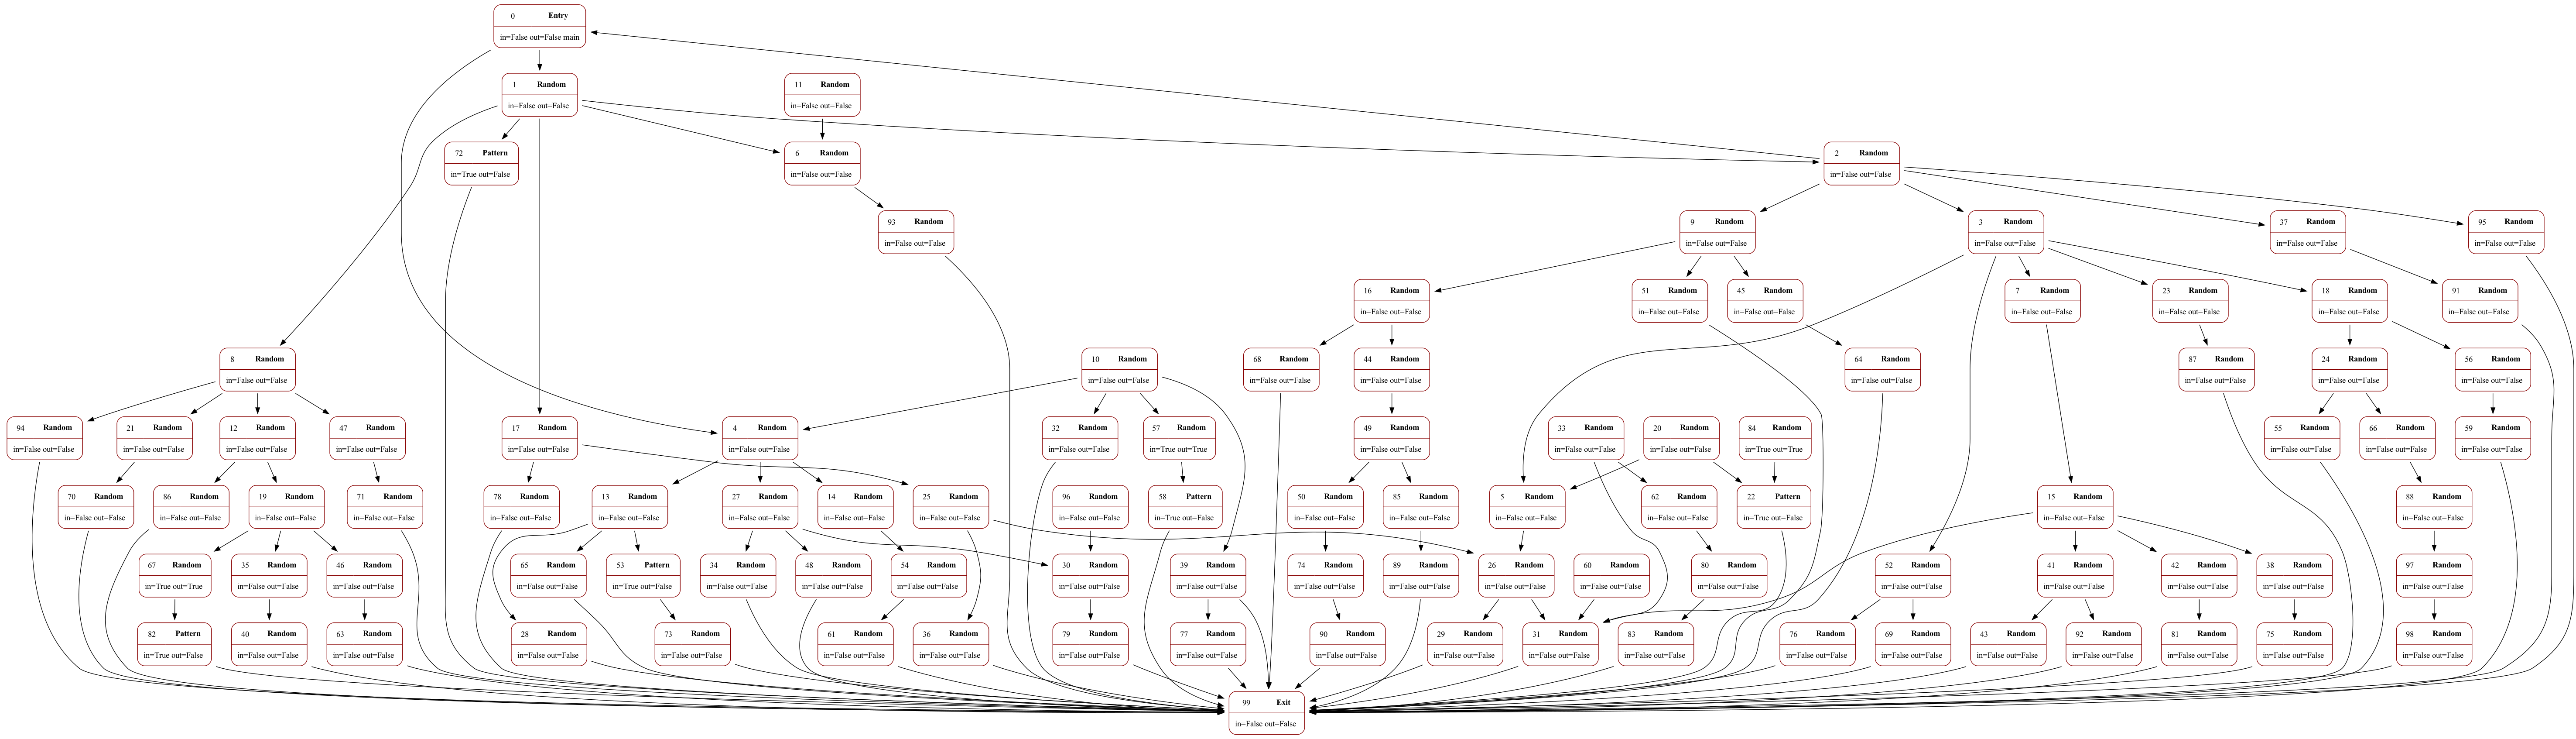

In [5]:
show_in_out(cfg1, in_dict, out_dict)  # type: ignore # noqa: F821

In [6]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg1)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:56  Samples:  136
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.021     CPU time: 0.020
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

0.021 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/3071474652.py:1
|- 0.019 DefinitelyReachingPTFA.__call__  ptfa.py:40
|  |- 0.007 DefinitelyReachingPTFA.next_nodes  ptfa.py:110
|  |  |- 0.005 CFG.get_any_children  code_analysis/CFG.py:34
|  |  |  |- 0.002 [self]  code_analysis/CFG.py
|  |  |  |- 0.002 CFG.get_children  code_analysis/Graph.py:44
|  |  |  |  |- 0.001 [self]  code_analysis/Graph.py
|  |  |  |  `- 0.001 dict.get  <built-in>
|  |  |  `- 0.001 list.copy  <built-in>
|  |  `- 0.002 [self]  ptfa.py
|  |- 0.004 [self]  ptfa.py
|  |- 0.004 DefinitelyReachingPTFA.check_node  ptfa.py:107
|  |  |- 0.003 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
|  |  |  |- 0.002 CFG.get_type  code_analysis/Graph.py:23
|  |  |  |  |- 0.001 [self]  code_analysis/Graph.py
|  |  |  |  `- 0.001 dict.get  <built-in>
|  |  |  `- 0.001 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
|  |  `- 0.001 [self]  ptfa.py
|  |- 0.002 list.pop  <built-in>
|  |- 0.001 list.append  <built-in>
|  |- 0.001 DefinitelyReachingPTFA.can_propagate  ptfa.py:113
|  |- 0.000 set.add  <built-in>
|  |- 0.000 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:100
|  |  `- 0.000 DefinitelyReachingPTFA.get_entry_node  ptfa.py:94
|  |     `- 0.000 [self]  ptfa.py
|  `- 0.000 DefinitelyReachingPTFA.propagate  ptfa.py:116
|- 0.001 Profiler.stop  pyinstrument/profiler.py:138
|     [4 frames hidden]  pyinstrument
`- 0.000 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/3071474652.py

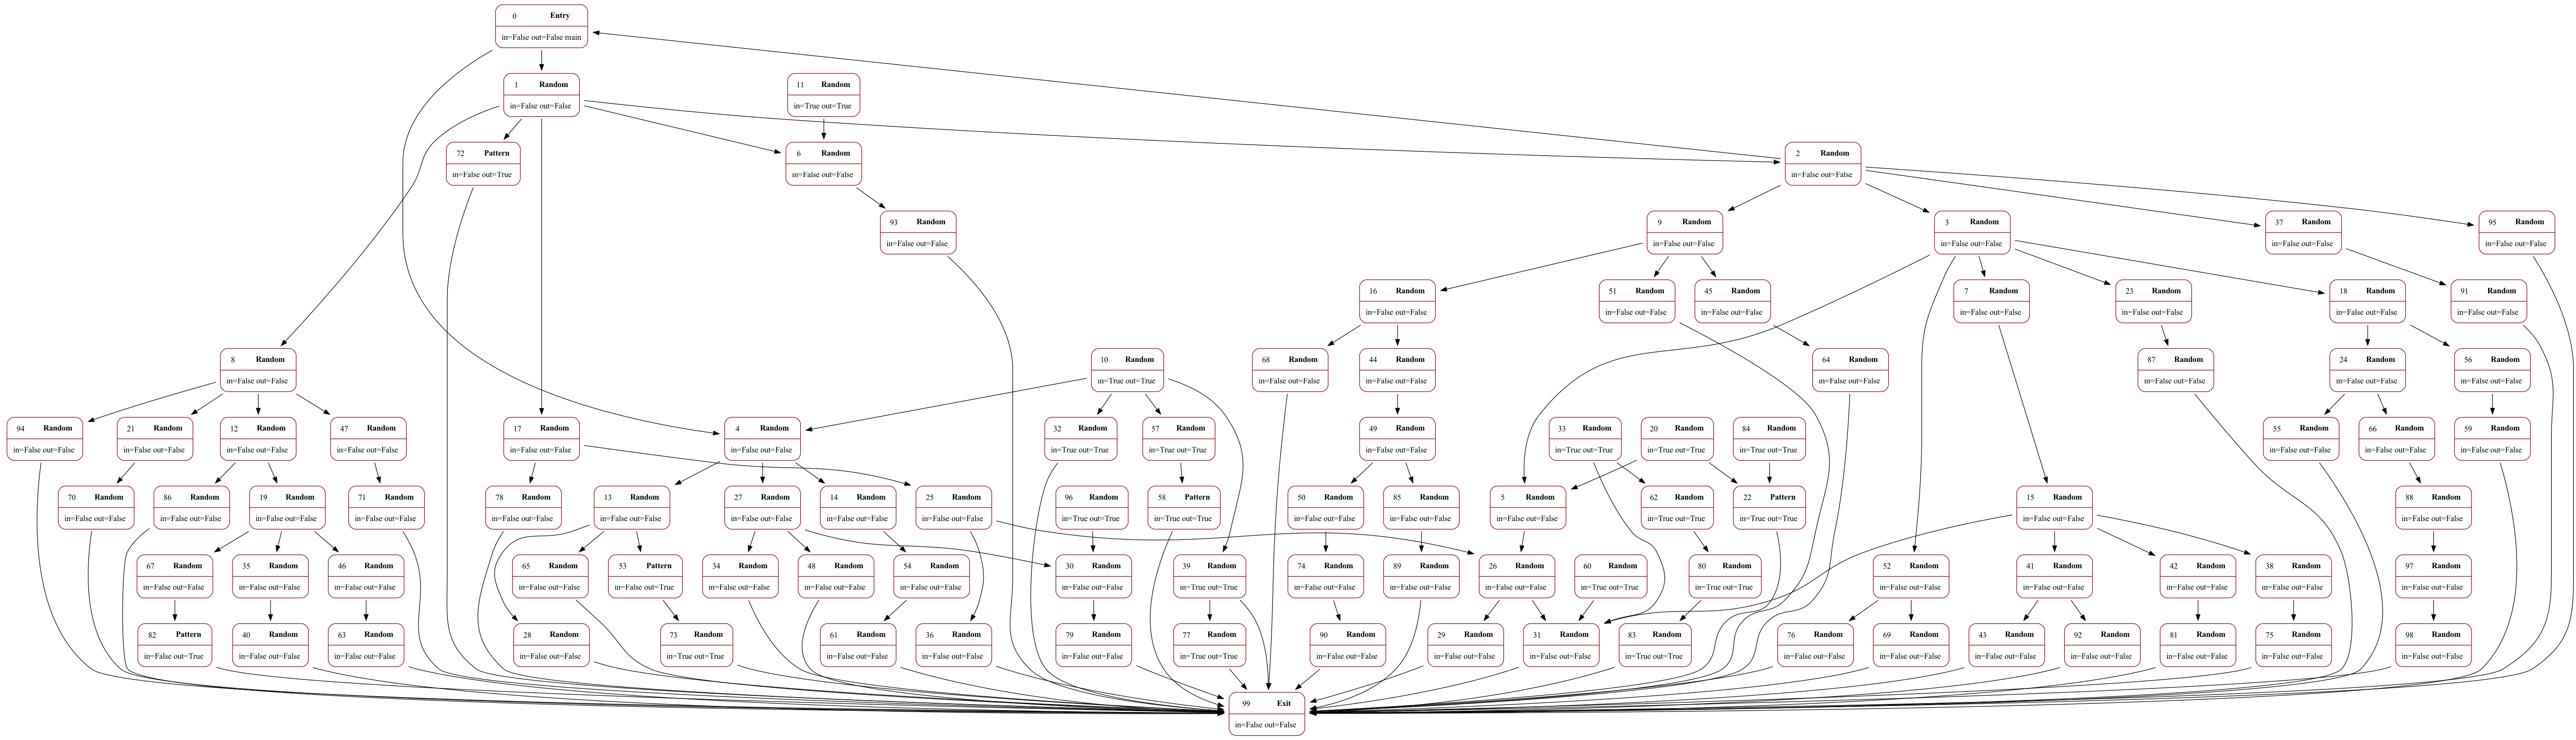

In [7]:
show_in_out(cfg1, in_dict, out_dict)  # type: ignore # noqa: F821

In [8]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg2)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:57  Samples:  825
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.116     CPU time: 0.108
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

0.115 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/175091642.py:1
`- 0.115 DefinitelyReachablePTFA.__call__  ptfa.py:40
   |- 0.033 [self]  ptfa.py
   |- 0.022 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:73
   |  `- 0.022 DefinitelyReachablePTFA.get_exit_node  ptfa.py:67
   |     |- 0.017 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.009 [self]  code_analysis/Graph.py
   |     |  `- 0.008 dict.get  <built-in>
   |     `- 0.005 [self]  ptfa.py
   |- 0.019 DefinitelyReachablePTFA.next_nodes  ptfa.py:83
   |  |- 0.016 CFG.get_any_parents  code_analysis/CFG.py:40
   |  |  |- 0.009 CFG.get_parents  code_analysis/Graph.py:49
   |  |  |  |- 0.006 [self]  code_analysis/Graph.py
   |  |  |  `- 0.003 dict.get  <built-in>
   |  |  |- 0.006 [self]  code_analysis/CFG.py
   |  |  `- 0.002 list.copy  <built-in>
   |  `- 0.003 [self]  ptfa.py
   |- 0.016 DefinitelyReachablePTFA.check_node  ptfa.py:80
   |  |- 0.010 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
   |  |  |- 0.006 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.003 [self]  code_analysis/Graph.py
   |  |  |  `- 0.003 dict.get  <built-in>
   |  |  `- 0.005 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
   |  `- 0.006 [self]  ptfa.py
   |- 0.006 set.add  <built-in>
   |- 0.006 list.append  <built-in>
   |- 0.006 DefinitelyReachablePTFA.can_propagate  ptfa.py:86
   |- 0.004 DefinitelyReachablePTFA.propagate  ptfa.py:89
   `- 0.003 list.pop  <built-in>

In [9]:
# show_in_out(cfg2, in_dict, out_dict)  # type: ignore # noqa: F821

In [10]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg2)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:57  Samples:  898
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.172     CPU time: 0.120
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

0.172 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/935048700.py:1
`- 0.172 DefinitelyReachingPTFA.__call__  ptfa.py:40
   |- 0.052 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:100
   |  `- 0.051 DefinitelyReachingPTFA.get_entry_node  ptfa.py:94
   |     |- 0.045 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.038 [self]  code_analysis/Graph.py
   |     |  `- 0.007 dict.get  <built-in>
   |     `- 0.006 [self]  ptfa.py
   |- 0.050 [self]  ptfa.py
   |- 0.035 DefinitelyReachingPTFA.next_nodes  ptfa.py:110
   |  |- 0.028 CFG.get_any_children  code_analysis/CFG.py:34
   |  |  |- 0.013 [self]  code_analysis/CFG.py
   |  |  |- 0.011 CFG.get_children  code_analysis/Graph.py:44
   |  |  |  |- 0.007 [self]  code_analysis/Graph.py
   |  |  |  `- 0.004 dict.get  <built-in>
   |  |  `- 0.004 list.copy  <built-in>
   |  `- 0.007 [self]  ptfa.py
   |- 0.012 DefinitelyReachingPTFA.check_node  ptfa.py:107
   |  |- 0.007 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
   |  |  |- 0.004 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  `- 0.003 [self]  code_analysis/Graph.py
   |  |  `- 0.003 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
   |  `- 0.005 [self]  ptfa.py
   |- 0.007 DefinitelyReachingPTFA.can_propagate  ptfa.py:113
   |- 0.005 DefinitelyReachingPTFA.propagate  ptfa.py:116
   |- 0.004 set.add  <built-in>
   |- 0.004 list.append  <built-in>
   `- 0.003 list.pop  <built-in>

In [11]:
# show_in_out(cfg2, in_dict, out_dict)  # type: ignore # noqa: F821

In [12]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg3)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:57  Samples:  4207
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.481     CPU time: 0.472
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

0.481 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/1110603606.py:1
`- 0.481 DefinitelyReachablePTFA.__call__  ptfa.py:40
   |- 0.134 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:73
   |  `- 0.133 DefinitelyReachablePTFA.get_exit_node  ptfa.py:67
   |     |- 0.094 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.060 [self]  code_analysis/Graph.py
   |     |  `- 0.034 dict.get  <built-in>
   |     `- 0.038 [self]  ptfa.py
   |- 0.104 [self]  ptfa.py
   |- 0.093 DefinitelyReachablePTFA.next_nodes  ptfa.py:83
   |  |- 0.076 CFG.get_any_parents  code_analysis/CFG.py:40
   |  |  |- 0.040 CFG.get_parents  code_analysis/Graph.py:49
   |  |  |  |- 0.026 [self]  code_analysis/Graph.py
   |  |  |  `- 0.014 dict.get  <built-in>
   |  |  |- 0.024 [self]  code_analysis/CFG.py
   |  |  `- 0.012 list.copy  <built-in>
   |  `- 0.016 [self]  ptfa.py
   |- 0.078 DefinitelyReachablePTFA.check_node  ptfa.py:80
   |  |- 0.050 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
   |  |  |- 0.034 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.018 dict.get  <built-in>
   |  |  |  `- 0.015 [self]  code_analysis/Graph.py
   |  |  `- 0.017 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
   |  `- 0.028 [self]  ptfa.py
   |- 0.026 DefinitelyReachablePTFA.can_propagate  ptfa.py:86
   |- 0.013 set.add  <built-in>
   |- 0.011 list.append  <built-in>
   |- 0.011 list.pop  <built-in>
   `- 0.011 DefinitelyReachablePTFA.propagate  ptfa.py:89

In [13]:
# show_in_out(cfg3, in_dict, out_dict)  # type: ignore # noqa: F821

In [14]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg3)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:58  Samples:  3553
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.480     CPU time: 0.398
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

0.479 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/759915911.py:1
`- 0.479 DefinitelyReachingPTFA.__call__  ptfa.py:40
   |- 0.153 DefinitelyReachingPTFA.next_nodes  ptfa.py:110
   |  |- 0.091 CFG.get_any_children  code_analysis/CFG.py:34
   |  |  |- 0.048 CFG.get_children  code_analysis/Graph.py:44
   |  |  |  |- 0.032 [self]  code_analysis/Graph.py
   |  |  |  `- 0.016 dict.get  <built-in>
   |  |  |- 0.030 [self]  code_analysis/CFG.py
   |  |  `- 0.012 list.copy  <built-in>
   |  `- 0.062 [self]  ptfa.py
   |- 0.110 [self]  ptfa.py
   |- 0.092 DefinitelyReachingPTFA.check_node  ptfa.py:107
   |  |- 0.047 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
   |  |  |- 0.034 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.019 [self]  code_analysis/Graph.py
   |  |  |  `- 0.015 dict.get  <built-in>
   |  |  `- 0.013 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
   |  `- 0.045 [self]  ptfa.py
   |- 0.041 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:100
   |  `- 0.041 DefinitelyReachingPTFA.get_entry_node  ptfa.py:94
   |     |- 0.027 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.016 [self]  code_analysis/Graph.py
   |     |  `- 0.011 dict.get  <built-in>
   |     `- 0.014 [self]  ptfa.py
   |- 0.030 DefinitelyReachingPTFA.can_propagate  ptfa.py:113
   |- 0.017 set.add  <built-in>
   |- 0.013 list.append  <built-in>
   |- 0.011 list.pop  <built-in>
   `- 0.011 DefinitelyReachingPTFA.propagate  ptfa.py:116

In [15]:
# show_in_out(cfg3, in_dict, out_dict)  # type: ignore # noqa: F821

In [16]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg4)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:06:59  Samples:  44324
 /_//_/// /_\ / //_// / //_'/ //     Duration: 5.289     CPU time: 5.113
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

5.288 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/492505757.py:1
`- 5.287 DefinitelyReachablePTFA.__call__  ptfa.py:40
   |- 1.473 DefinitelyReachablePTFA.next_nodes  ptfa.py:83
   |  |- 1.198 CFG.get_any_parents  code_analysis/CFG.py:40
   |  |  |- 0.637 CFG.get_parents  code_analysis/Graph.py:49
   |  |  |  |- 0.435 [self]  code_analysis/Graph.py
   |  |  |  `- 0.201 dict.get  <built-in>
   |  |  |- 0.391 [self]  code_analysis/CFG.py
   |  |  `- 0.170 list.copy  <built-in>
   |  `- 0.275 [self]  ptfa.py
   |- 1.280 [self]  ptfa.py
   |- 1.215 DefinitelyReachablePTFA.check_node  ptfa.py:80
   |  |- 0.843 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
   |  |  |- 0.597 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.360 [self]  code_analysis/Graph.py
   |  |  |  `- 0.225 dict.get  <built-in>
   |  |  `- 0.246 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
   |  `- 0.372 [self]  ptfa.py
   |- 0.412 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:73
   |  `- 0.411 DefinitelyReachablePTFA.get_exit_node  ptfa.py:67
   |     |- 0.287 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.161 [self]  code_analysis/Graph.py
   |     |  `- 0.127 dict.get  <built-in>
   |     `- 0.120 [self]  ptfa.py
   |- 0.329 DefinitelyReachablePTFA.can_propagate  ptfa.py:86
   |- 0.162 set.add  <built-in>
   |- 0.145 list.pop  <built-in>
   |- 0.135 DefinitelyReachablePTFA.propagate  ptfa.py:89
   `- 0.122 list.append  <built-in>

In [17]:
# show_in_out(cfg4, in_dict, out_dict)  # type: ignore # noqa: F821

In [18]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg4)

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:07:12  Samples:  45201
 /_//_/// /_\ / //_// / //_'/ //     Duration: 5.063     CPU time: 4.946
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-4727t5FPMYODyieX.json

5.063 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/3196353546.py:1
`- 5.061 DefinitelyReachingPTFA.__call__  ptfa.py:40
   |- 1.456 DefinitelyReachingPTFA.next_nodes  ptfa.py:110
   |  |- 1.215 CFG.get_any_children  code_analysis/CFG.py:34
   |  |  |- 0.638 CFG.get_children  code_analysis/Graph.py:44
   |  |  |  |- 0.414 [self]  code_analysis/Graph.py
   |  |  |  `- 0.220 dict.get  <built-in>
   |  |  |- 0.394 [self]  code_analysis/CFG.py
   |  |  `- 0.183 list.copy  <built-in>
   |  `- 0.241 [self]  ptfa.py
   |- 1.411 [self]  ptfa.py
   |- 0.776 DefinitelyReachingPTFA.check_node  ptfa.py:107
   |  |- 0.415 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py:1
   |  |  |- 0.287 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.150 dict.get  <built-in>
   |  |  |  `- 0.130 [self]  code_analysis/Graph.py
   |  |  `- 0.128 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_4851/2658019887.py
   |  `- 0.362 [self]  ptfa.py
   |- 0.458 DefinitelyReachingPTFA.can_propagate  ptfa.py:113
   |- 0.347 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:100
   |  `- 0.345 DefinitelyReachingPTFA.get_entry_node  ptfa.py:94
   |     |- 0.229 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.144 [self]  code_analysis/Graph.py
   |     |  `- 0.085 dict.get  <built-in>
   |     `- 0.113 [self]  ptfa.py
   |- 0.167 set.add  <built-in>
   |- 0.154 DefinitelyReachingPTFA.propagate  ptfa.py:116
   |- 0.146 list.pop  <built-in>
   `- 0.142 list.append  <built-in>

In [19]:
# show_in_out(cfg4, in_dict, out_dict)  # type: ignore # noqa: F821

## Utilisation sur un CFG

### fopen - fclose

In [20]:
cfg = cfg_reader.read_cfg("../tp/part_1/file1.php.cfg.json")

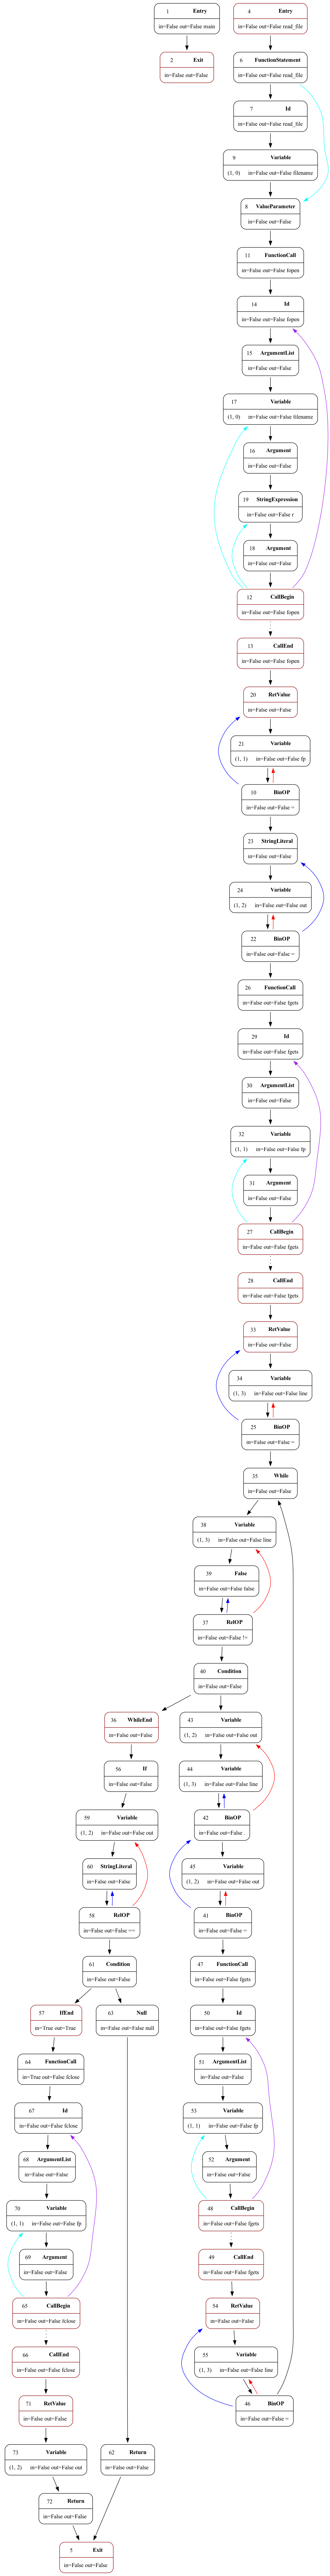

In [21]:
ptfa = DefinitelyReachablePTFA(
    lambda cfg, nid: cfg.get_type(nid) == "FunctionCall"
    and cfg.get_image(nid) == "fclose"
)
in_dict, out_dict = ptfa(cfg)
show_in_out(cfg, in_dict, out_dict)

### Protections

In [22]:
cfg = cfg_reader.read_cfg("../tp/part_2/wp-db.php.cfg.json")

In [28]:
def check(cfg: CFG, nid: int) -> bool:
    if not cfg.get_type(nid) == "If":
        return False

    children = cfg.get_children(nid)
    if len(children) != 1:
        return False
    child = children[0]
    if cfg.get_type(child) != "FunctionCall":
        return False

    children = cfg.get_children(child)
    if len(children) != 1:
        return False
    child = children[0]
    if not (cfg.get_type(child) == "Id" and cfg.get_image(child) == "has_cap"):
        return False

    children = cfg.get_children(child)
    if len(children) != 1:
        return False
    child = children[0]
    if cfg.get_type(child) != "ArgumentList":
        return False

    children = cfg.get_children(child)
    if len(children) != 1:
        return False
    child = children[0]
    if not (
        cfg.get_type(child) == "StringLiteral" and cfg.get_image(child) == "use_db"
    ):
        return False

    return True


ptfa = DefinitelyReachingPTFA(check)
in_dict, out_dict = ptfa(cfg)
annoted = show_in_out(cfg, in_dict, out_dict)

dot = annoted.to_dot()
s = Source(dot)
s.render("wp-db", format="pdf", cleanup=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.89476 to fit


'wp-db.pdf'

## Réparation automatique

## Justifier